In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('rewards_log_300.pkl', 'rb') as f:
    reward = pickle.load(f)


In [3]:
reward_0 = reward['Episode 1']

In [6]:
# Filter out elements with commission > 100
filtered_data = [entry for entry in reward_0 if entry['commission'] <= 100]

# Extract data for plotting (only first 230 elements)
filtered_data = filtered_data[:240]
pnl = [entry['pnl'] for entry in filtered_data]
pnl_exclude_commission = [entry['pnl_exclude_commission'] for entry in filtered_data]
commission = [entry['commission'] for entry in filtered_data]
total_trading_actions = [entry['total_trading_actions'] for entry in filtered_data]
shares_traded = [entry['shares_traded'] for entry in filtered_data]

# Calculate cumulative PnL
cumulative_pnl = np.cumsum(pnl)

# Calculate moving averages
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

commission_ma = moving_average(commission)
total_trading_actions_ma = moving_average(total_trading_actions)
shares_traded_ma = moving_average(shares_traded)

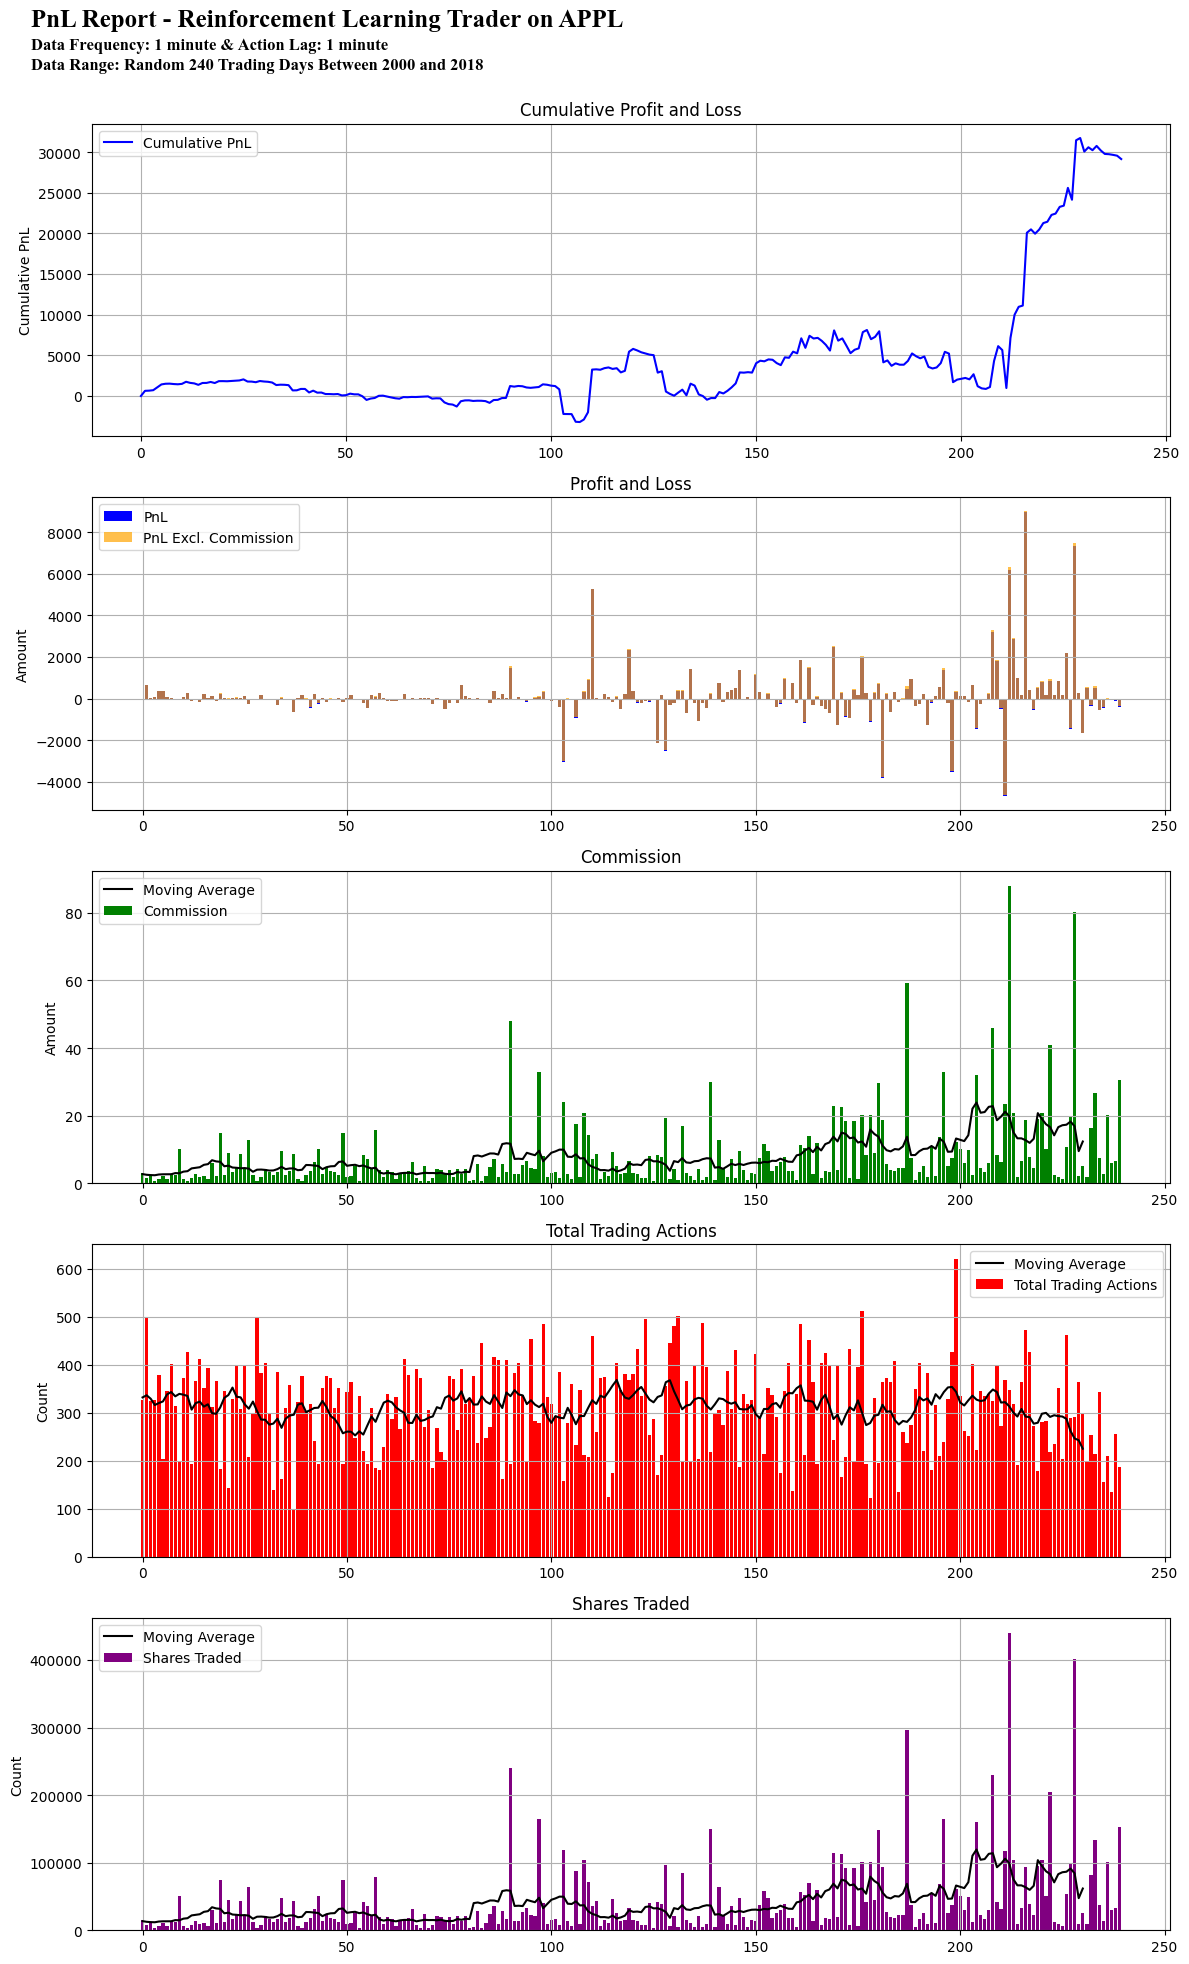

In [7]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 20))

# Add a general title to the figure
fig.suptitle('PnL Report - Reinforcement Learning Trader on APPL',
              fontsize=18,fontweight='bold', fontname='Times New Roman', x=0.03, ha='left')

# Add additional information as subtitles
fig.text(0.03, 0.96, 'Data Frequency: 1 minute & Action Lag: 1 minute',
         fontname='Times New Roman', fontsize=12, fontweight='bold', ha='left')
# Add additional information as subtitles
fig.text(0.03, 0.95, 'Data Range: Random 240 Trading Days Between 2000 and 2018',
         fontname='Times New Roman', fontsize=12, fontweight='bold', ha='left')

# Plot Cumulative PnL
axs[0].plot(cumulative_pnl, label='Cumulative PnL', color='blue')
axs[0].set_title('Cumulative Profit and Loss')
axs[0].set_ylabel('Cumulative PnL')
axs[0].legend()
axs[0].grid(True)

# Plot PnL
axs[1].bar(range(len(pnl)), pnl, label='PnL', color='blue')
axs[1].bar(range(len(pnl_exclude_commission)), pnl_exclude_commission, label='PnL Excl. Commission', color='orange', alpha=0.7)
axs[1].set_title('Profit and Loss')
axs[1].set_ylabel('Amount')
axs[1].legend()
axs[1].grid(True)

# Plot Commission
axs[2].bar(range(len(commission)), commission, label='Commission', color='green')
axs[2].plot(range(len(commission_ma)), commission_ma, label='Moving Average', color='black')
axs[2].set_title('Commission')
axs[2].set_ylabel('Amount')
axs[2].legend()
axs[2].grid(True)

# Plot Total Trading Actions
axs[3].bar(range(len(total_trading_actions)), total_trading_actions, label='Total Trading Actions', color='red')
axs[3].plot(range(len(total_trading_actions_ma)), total_trading_actions_ma, label='Moving Average', color='black')
axs[3].set_title('Total Trading Actions')
axs[3].set_ylabel('Count')
axs[3].legend()
axs[3].grid(True)

# Plot Shares Traded
axs[4].bar(range(len(shares_traded)), shares_traded, label='Shares Traded', color='purple')
axs[4].plot(range(len(shares_traded_ma)), shares_traded_ma, label='Moving Average', color='black')
axs[4].set_title('Shares Traded')
axs[4].set_ylabel('Count')
axs[4].legend()
axs[4].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()
